#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud

import nltk
from nltk.tokenize import sent_tokenize,word_tokenize

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Read Data

In [2]:
df = pd.read_csv('restaurant.csv')

In [3]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


#### EDA - Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [5]:
df = df[['stars', 'text']]

In [6]:
df.sample(5)

,stars,text
6850,3,It is ok for what it is. I was just disappoint...
2397,5,"Hands down, best buffet in Las Vegas as of 5/1..."
9549,5,Very good quality buffet. It was pricier than ...
3498,2,"The wait is long, the line to the food is even..."
773,4,the wait on a saturday at 445 was about an hou...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stars   10417 non-null  int64 
 1   text    10417 non-null  object
dtypes: int64(1), object(1)
memory usage: 162.9+ KB


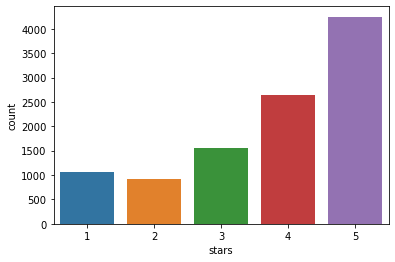

In [8]:
sns.countplot(df['stars']);

#### NLP Preperation

Convert to lowercase

In [10]:
df['text']=df['text'].str.lower()

Remove Punctuation

In [11]:
df['text']=df['text'].replace(['^\w\s',''])

Remove Digits

In [12]:
df['text']=df['text'].str.replace('\d+','')

Remove line breaks

In [13]:
df['text']=df['text'].str.replace('\n ',' ').replace('\r','')

Sentiment Feauture according stars

In [14]:
df.loc[df['stars']==3,"sentiment"]="neutral"
df.loc[df['stars']<3,"sentiment"]="negative"
df.loc[df['stars']>3,"sentiment"]="positive"

In [15]:
df.head()

,stars,text,sentiment
0,5,after getting food poisoning at the palms hote...,positive
1,4,"""a feast worthy of gods""\n\nbaccarnal buffet i...",positive
2,4,the crab legs are better than the ones at wick...,positive
3,1,not worth it! too salty food and expensive! th...,negative
4,5,i would give this infinite stars if i could. m...,positive


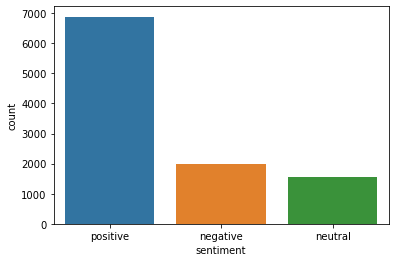

In [16]:
sns.countplot(df['sentiment']);

Language dedection

In [19]:
from langdetect import detect_langs
language = [detect_langs(i) for i in df.text]
languages = [str(i[0]).split(':')[0] for i in language]
df['language'] = languages

In [21]:
df.language.value_counts()

en       10373
es          10
zh-cn        7
ja           7
fr           5
de           4
ko           3
zh-tw        3
da           2
sw           1
pt           1
sk           1
Name: language, dtype: int64

In [22]:
df=df[df['language']=='en']
df.reset_index(drop=True,inplace=True)

In [23]:
x,y=df['text'],df['sentiment']

In [24]:
def tokenize_test(vect,x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    g=GaussianNB()
    b=BernoulliNB()
    SVC=SVC()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGBC=XGBClassifier()
    
    #algos=[g,b,SVC,KN,D,R,Log,XGBC]
    #algo_names=['GaussianNB','BernoulliNB','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
    
    algos=[g,b,SVC]
    algo_names=['GaussianNB','BernoulliNB','SVC']
    
    
    accuracy_scored=[]    
        
    x_train_dtm=vect.fit_transform(x_train).toarray()
    x_test_dtm=vect.transform(x_test).toarray()
    
    for item in algos:
        item.fit(x_train_dtm,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test_dtm)))
    result=pd.DataFrame(accuracy_scored,columns=['accuracy_score'],index=algo_names)
    result.accuracy_score=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [25]:
vect=CountVectorizer()
tokenize_test(vect,x,y)

(8298,) (2075,) (8298,) (2075,)


,accuracy_score
SVC,0.775904
BernoulliNB,0.685783
GaussianNB,0.385542


In [26]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=100).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [27]:
negative_data=df[df['sentiment']=="negative"]['text']
positive_data=df[df['sentiment']=="positive"]['text']
neutral_data=df[df['sentiment']=="neutral"]['text']

#### Visualization

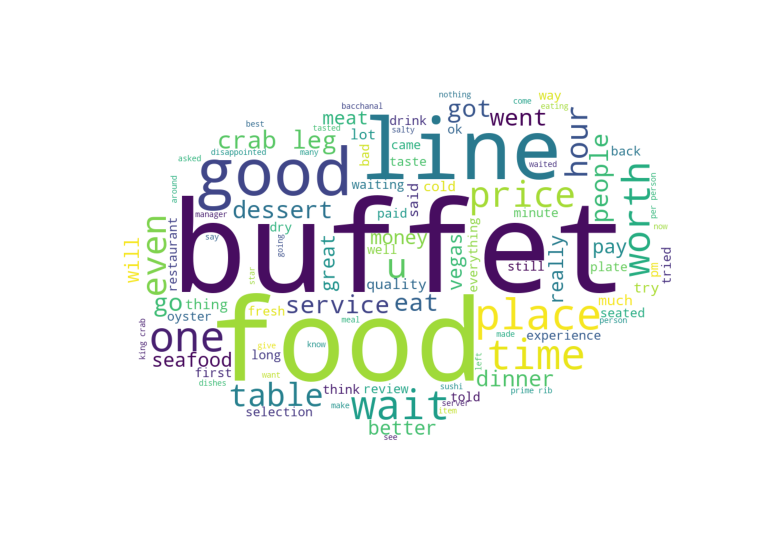

In [28]:
wc(negative_data,'white')

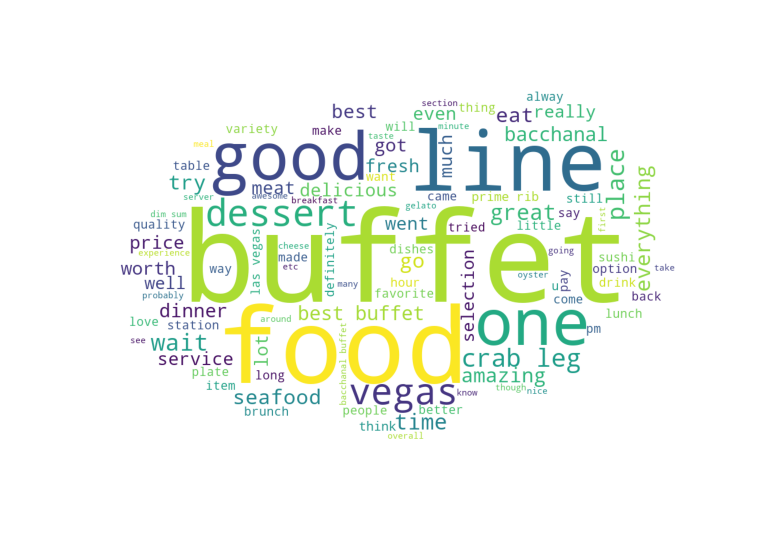

In [29]:
wc(positive_data,'white')

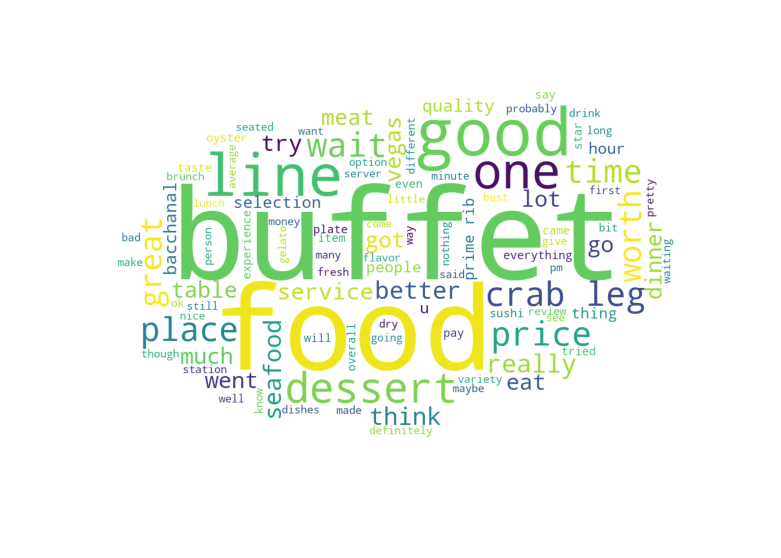

In [30]:
wc(neutral_data,'white')